# The data

We are looking 

In [2]:
import os.path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble

sys.path.append("../../")  # trick to import clairvoya from internal notebook directory
import clairvoya.runbench
import clairvoya.pulearning
import clairvoya.voya_plotter
import clairvoya.datasetup

%matplotlib inline

data_file_name = '../data/test1_uni_f_small_10k.csv'

In [3]:
df = pd.read_csv(data_file_name)
df.head()

,cid,label,cid/tech/ecommerce,url/tech/traffic_rank,url/tech/conversion_tracking,url/tech/html_ids,url/tech/html_classes,url/tech/login,url/tech/platform_count,url/tech/subscribe,url/tech/univ_analytics,url/tech/tech_sum,url/tech/likes,url/tech/feedback,url/tech/analytics_count,url/tech/video_count,url/tech/mobile_aware
0,899001,1,1,4.550876,0,1.672098,2.296665,1,6,1,0,1,5.264343,0,1,0,0
1,1703999,1,0,7.154740,0,0.477121,1.204120,0,0,0,0,1,0.000000,0,0,0,0
2,2247971,1,0,6.422567,0,2.053078,1.477121,1,0,0,0,0,0.000000,0,1,0,0
3,308163,1,0,6.796991,0,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0,0
4,1935839,1,0,6.796991,0,1.000000,1.000000,0,0,0,0,0,0.000000,0,0,0,0


In [4]:
df.describe()

,cid,label,cid/tech/ecommerce,url/tech/traffic_rank,url/tech/conversion_tracking,url/tech/html_ids,url/tech/html_classes,url/tech/login,url/tech/platform_count,url/tech/subscribe,url/tech/univ_analytics,url/tech/tech_sum,url/tech/likes,url/tech/feedback,url/tech/analytics_count,url/tech/video_count,url/tech/mobile_aware
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1623177.459300,-0.29430,0.101100,6.683658,0.027800,0.922723,1.082209,0.319400,1.245400,0.121500,0.127300,0.565900,0.847514,0.00210,0.065100,0.077500,0.335100
std,913549.639658,0.58696,0.301476,0.413171,0.173292,0.723638,0.833653,0.466267,1.646344,0.326724,0.333325,0.495663,1.383582,0.04578,0.266212,0.282315,0.579863
min,66.000000,-1.00000,0.000000,2.346353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,900693.000000,-1.00000,0.000000,6.756955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1686849.000000,0.00000,0.000000,6.796991,0.000000,1.113943,1.301030,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2096237.500000,0.00000,0.000000,6.796991,0.000000,1.518514,1.826075,1.000000,2.000000,0.000000,0.000000,1.000000,1.908485,0.00000,0.000000,0.000000,1.000000
max,4271481.000000,1.00000,1.000000,7.381362,2.000000,3.000434,2.848189,1.000000,8.000000,1.000000,1.000000,1.000000,6.883299,1.00000,3.000000,2.000000,2.000000


So lets scale the features and plot the continous variables

In [5]:
clairvoya.datasetup.scale_dataframe_features(df)
df.columns = [col.replace('url/tech/', '').replace('cid/tech/', '') for col in df.columns]
df.describe()

/Users/ryan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:498: UserWarning: MinMaxScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


,cid,label,ecommerce,traffic_rank,conversion_tracking,html_ids,html_classes,login,platform_count,subscribe,univ_analytics,tech_sum,likes,feedback,analytics_count,video_count,mobile_aware
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1623177.459300,-0.29430,0.101100,0.861429,0.013900,0.307530,0.379964,0.319400,0.155675,0.121500,0.127300,0.565900,0.123126,0.00210,0.021700,0.038750,0.167550
std,913549.639658,0.58696,0.301476,0.082060,0.086646,0.241178,0.292696,0.466267,0.205793,0.326724,0.333325,0.495663,0.201006,0.04578,0.088737,0.141157,0.289932
min,66.000000,-1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,900693.000000,-1.00000,0.000000,0.875987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1686849.000000,0.00000,0.000000,0.883938,0.000000,0.371261,0.456792,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2096237.500000,0.00000,0.000000,0.883938,0.000000,0.506098,0.641135,1.000000,0.250000,0.000000,0.000000,1.000000,0.277263,0.00000,0.000000,0.000000,0.500000
max,4271481.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [6]:
pd.value_counts(df[['label']].values.ravel())

 0    5689
-1    3627
 1     684
dtype: int64

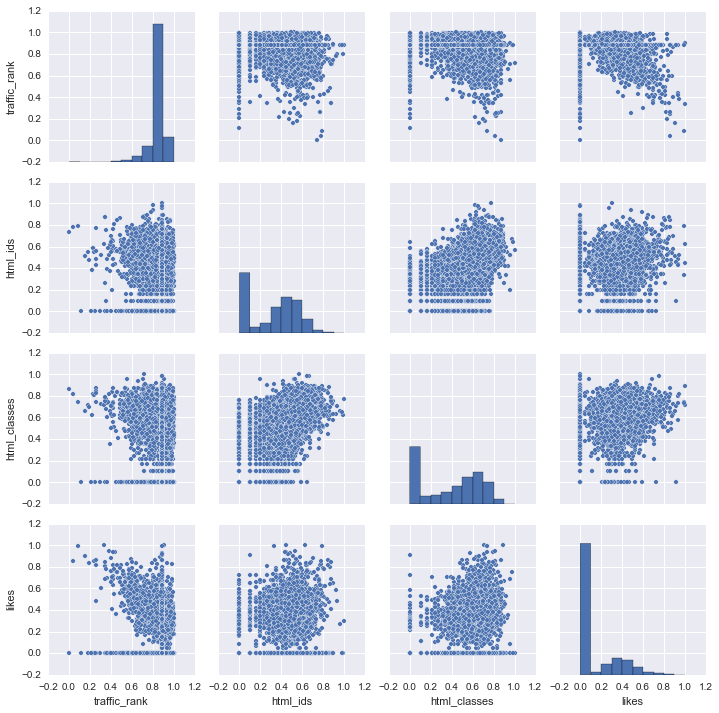

In [7]:
df_continuous_vars = df[['traffic_rank', 'html_ids', 'html_classes', 'likes']]
seaborn.pairplot(df_continuous_vars)

# Configuring the benchmark

In [8]:
config = {
    "data_file": data_file_name,
    "out_path": None, # TODO Disable
    "num_folds": 5,
    "test_size": 0.2,
    "pu_learning": True,
    "num_cores": 3,
    "verbosity": 0
}

svc_estimator = sklearn.svm.SVC(C=2.5, kernel='linear', class_weight='auto', probability=True)

classifiers = {
    'PosOnly(E&N2008)': clairvoya.pulearning.PosOnly(svc_estimator, hold_out_ratio=0.2, ),
    'SVM_DoubleWeight(E&N2008)': clairvoya.pulearning.PULearnByDoubleWeighting(svc_estimator),
}

classifiers_gridparameters = { # Gridsearch off
    'PosOnly(E&N2008)': None,
    'SVM_DoubleWeight(E&N2008)': None,
}

In [9]:
results_dict = clairvoya.runbench.run_benchmark(config, classifiers, classifiers_gridparameters)

In [10]:
clf_names = results_dict.keys()
clairvoya.benchmarks.results_dict_to_data_frame(results_dict)

,Classifier,AUC Score,F1 Score
0,PosOnly(E&N2008),0.615321,0.078030
1,SVM_DoubleWeight(E&N2008),0.603388,0.088038


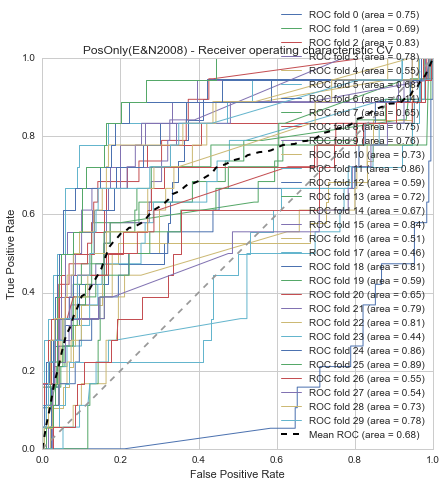

In [13]:
clairvoya.voya_plotter.roc_curve_cv(results_dict[clf_names[0]], 30)

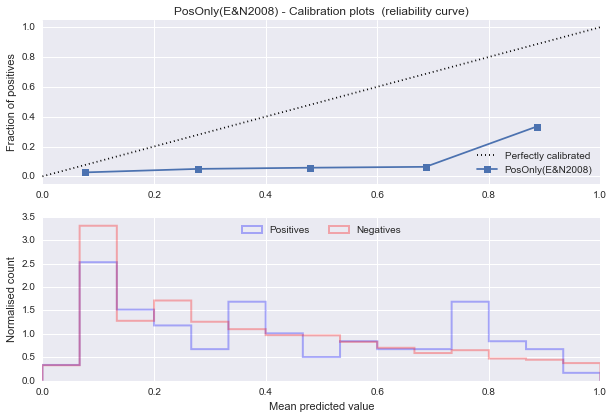

In [12]:
clairvoya.voya_plotter.reliability_curve(results_dict[clf_names[0]])